### KNN

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [109]:
data = pd.read_csv('../data/Iris.csv')
data = data.rename(index=str, columns={"Species": "Class"})

In [110]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
data['Class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64

In [112]:
target_names_iris = ['setosa', 'versicolor', 'virginica']

X = data.drop(['SepalWidthCm','PetalWidthCm','Class','Id'],axis=1).values
y = data['Class'].values

from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
y = labelencoder_previsores.fit_transform(y)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features,columns=df.columns[1:3]).values

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

<IPython.core.display.Javascript object>


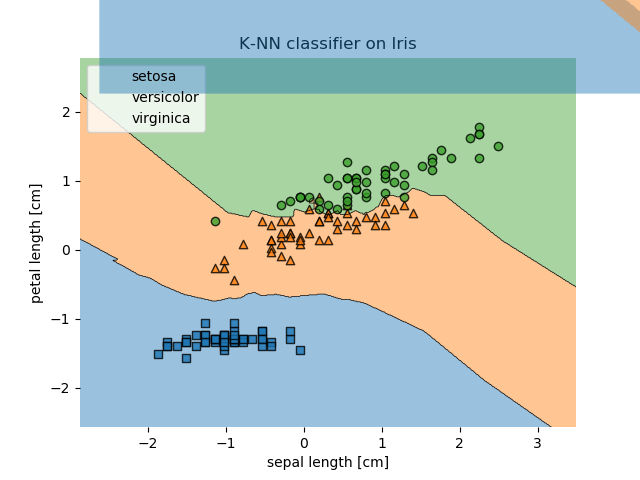

In [121]:
#Decision regions in 2D
from mlxtend.plotting import plot_decision_regions

#Plotting decision regions
plot_decision_regions(X, y, clf=knn, legend=3)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('K-NN classifier on Iris')
plt.legend(target_names_iris)
plt.show()

In [123]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(knn, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

0.9333333333333333


In [124]:
print(classification_report(y_test,pred))
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

KNN model accuracy(in %): 93.33333333333333
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


####  Escolhendo um valor K

In [87]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>


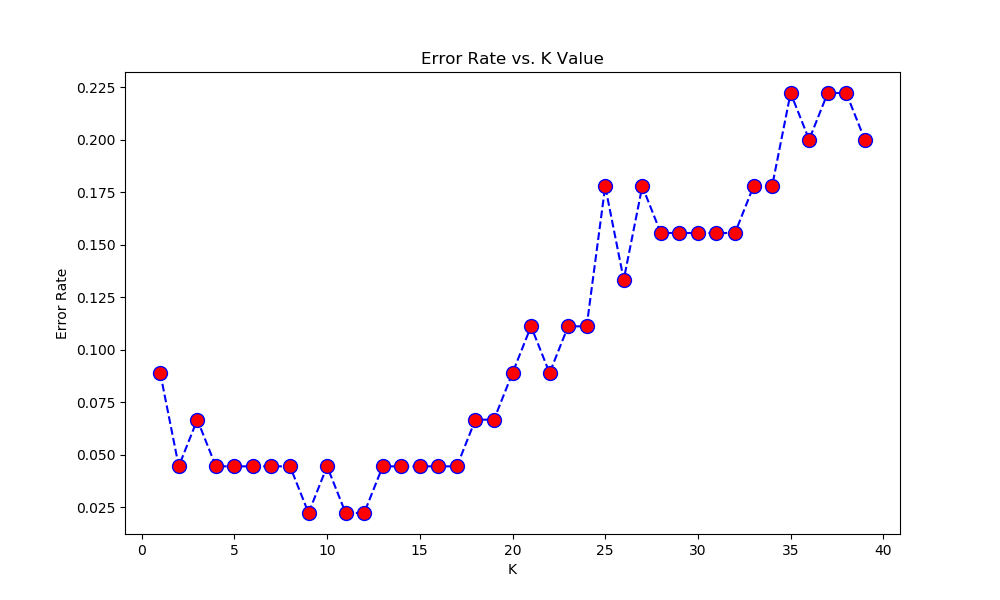

Text(0, 0.5, 'Error Rate')

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')